# Support Vector Machine Classification

## Initial Notewbook Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=Warning)


In [4]:
# Import Dataset
df = pd.read_csv('../Data/mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


## EDA and Data Prep

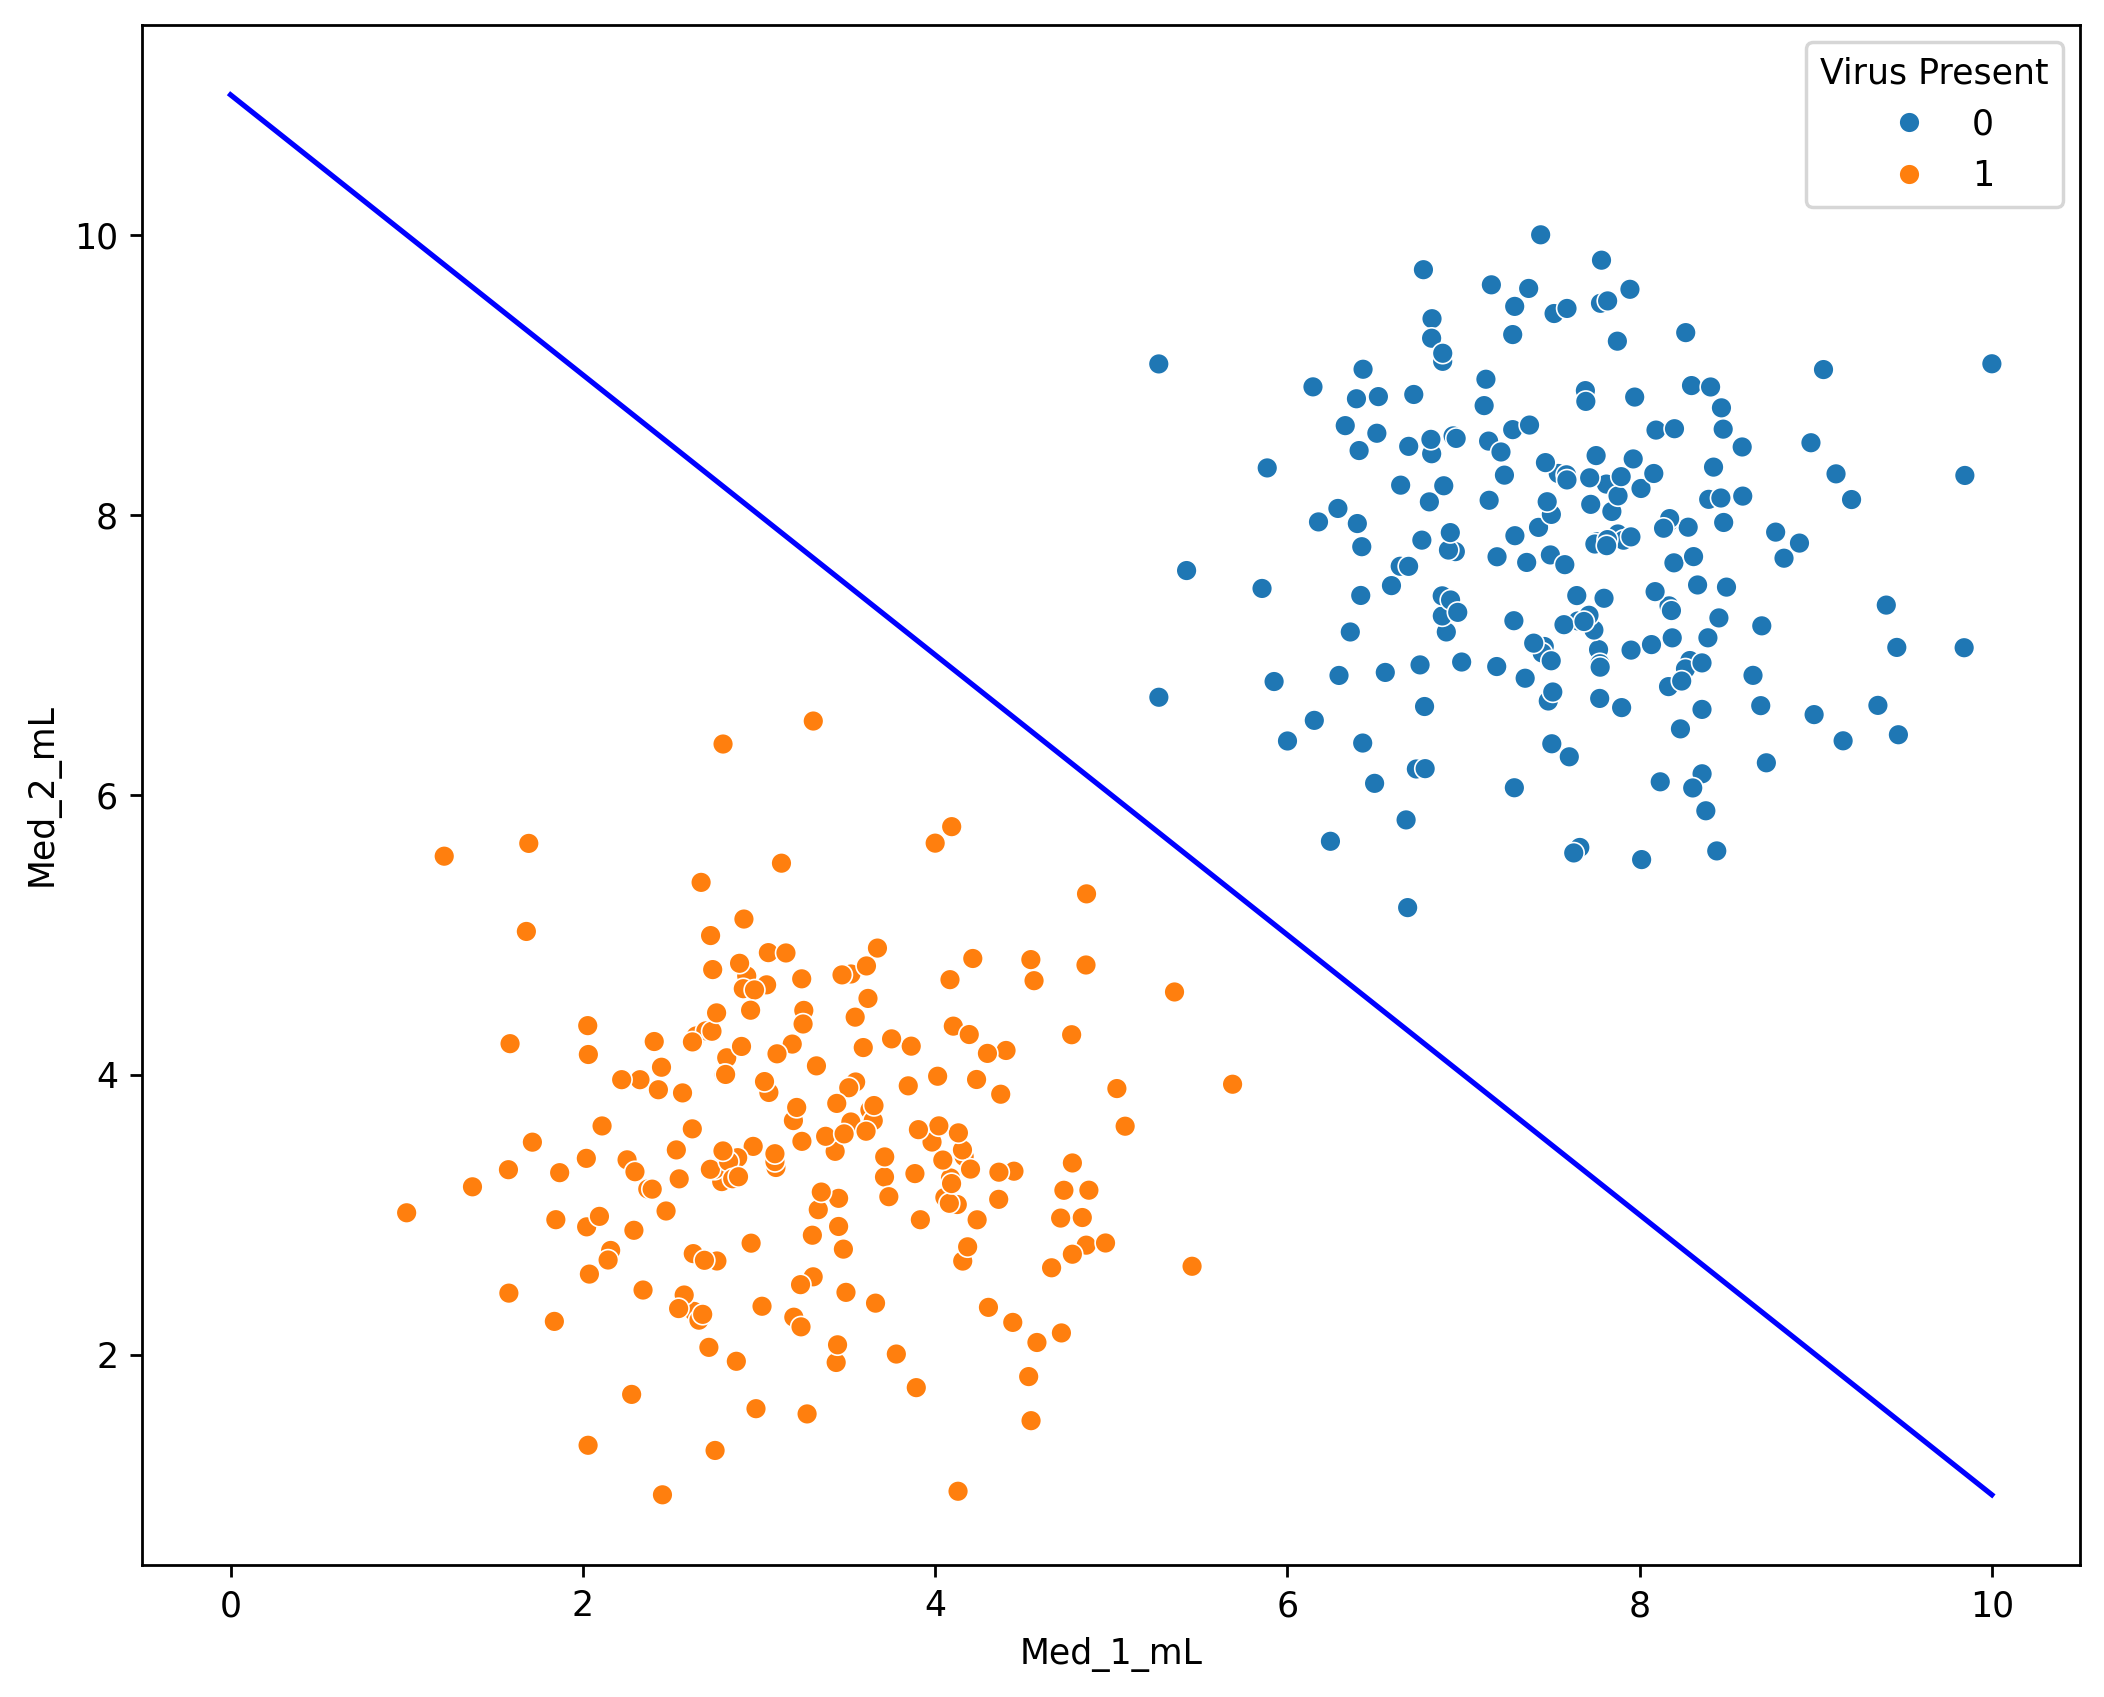

In [6]:
plt.figure(figsize=(10,8), dpi=250)
sns.scatterplot(data=df, x=('Med_1_mL'), y=('Med_2_mL'), hue='Virus Present')

# Hyperplance (2d line)
x = np.linspace(0, 10, 100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y, 'blue');

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Med_1_mL,400.0,5.447984,2.319059,1.0,3.249062,5.393776,7.630389,10.0
Med_2_mL,400.0,5.616750,2.336637,1.0,3.431311,5.638471,7.782614,10.0
Virus Present,400.0,0.500000,0.500626,0.0,0.000000,0.500000,1.000000,1.0


In [8]:
df.shape

(400, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## Building the Model

In [11]:
from sklearn.svm import SVC

In [12]:
# help(SVC)

In [13]:
# X Y split
y = df['Virus Present']
X = df.drop('Virus Present', axis=1)

In [14]:
model = SVC(kernel='linear', C=1000)

In [15]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [16]:
from svm_margin_plot import plot_svm_boundary

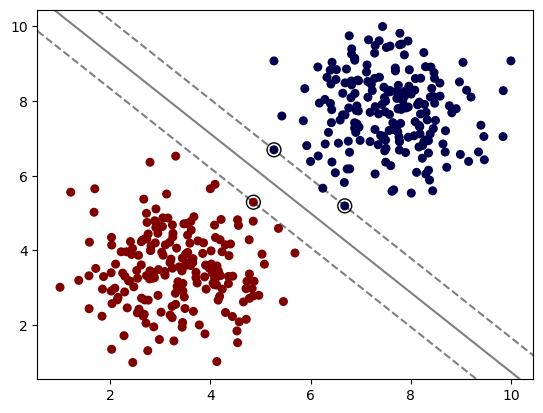

In [17]:
plot_svm_boundary(model, X, y);

In [18]:
model = SVC(kernel='linear', C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

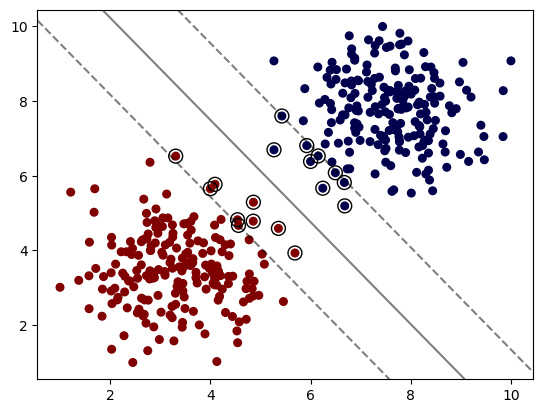

In [19]:
plot_svm_boundary(model, X, y);

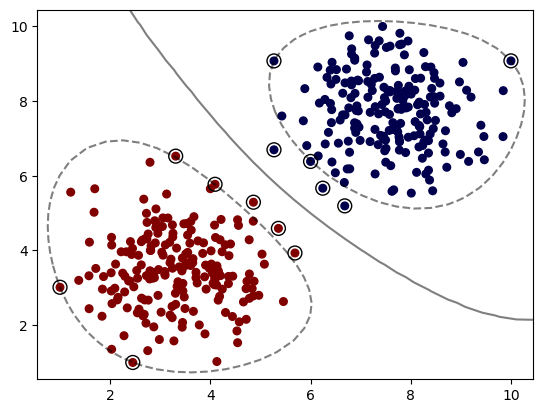

In [20]:
model = SVC(kernel='rbf', C=1, gamma='scale')
model.fit(X,y)
plot_svm_boundary(model, X, y);

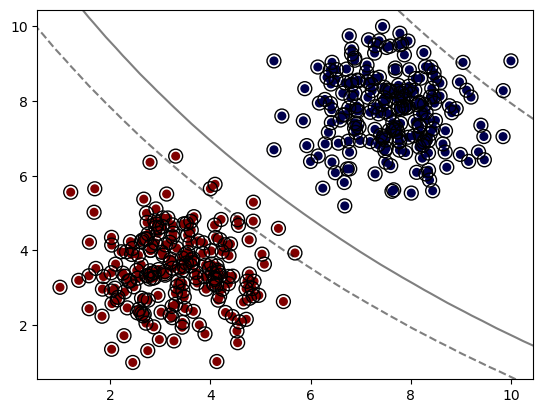

In [21]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model, X, y);

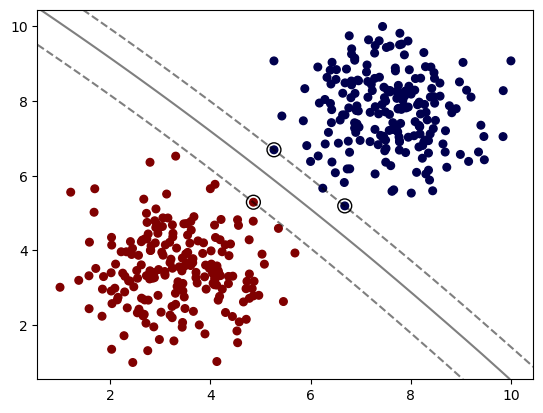

In [22]:
model = SVC(kernel='poly', degree=4, C=0.5)
model.fit(X,y)
plot_svm_boundary(model, X, y);

## SVC Grid Search

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
svm = SVC()
param_grid = {'C':[0.01, 0.1,1], 'kernel':['linear', 'rbf']}

In [26]:
grid = GridSearchCV(svm, param_grid)

In [27]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [28]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}